# Median Filter For Noise Reduction in Atmospheric Readings

## Outline Ideas
* Problem 
    * Separate noise from signal 
    * Possible lack of communication 
* Possible Solution 
* Evaluation of solution 

## Problem Statement
Earth's atmosphere is an incredibly dynamic and hard-to-predict environment --- temperatures, wind speeds, and UV radiation acting on an object will vary wildly as it ascends to ever-greater heights. We face this challenging environment with the goal of accurately sensing the altitude of a small payload tethered to a high-altitude weather balloon. As the payload must execute certain mission-critical operations at a specific altitude, an investigation into noise reduction in our atmospheric sensing systems has been deemed necessary. In addition to the unavoidable noise and variation in atmospheric conditions, there is also the possibility of the loss of communication between the ground station and payload, further necessitating reliance on the payload's automatic decision-making in the potential absence of manually-sent commands. Our primary objective, therefore, is to develop a method to effectively separate noise from the signal and accurately assess the altitude of the payload.

## Possible Solutions
A number of potential solutions have been proposed: 
* Bandpass filtering 
* Arithmetic Mean filtering
* Median filtering
Here, each of these solutions will be detailed

### Bandpass Filtering

### Arithmetic Mean Filtering

### Median filtering
Median filtering is the process of replacing each entry in a signal with the median of itself and surrounding data points. We will define a median filter to be of algorithmic complexity $\mathcal{O}(n)$ if it calculates the median for a given data point with the $\it{n}$ nearest data points. In contrast to both bandpass and arithmetic mean filtering, a median filter has the advantage of effectively filtering even the most extreme outliers from the data set provided that there are a sufficient number of valid data points. 

Simplicity is another advantage of median filter over more sophisticated approaches. A median filter can be implemented by maintaining a list of last $\it{n}$ measured values, sorting the list of values, and selecting the midpoint of the newly-sorted list. Due to the nature of a sorted list, outlying values will be pushed to the extreme ends of either side of the list and will therefore be ignored. By selecting the median of this list, if the range of surrounding values is of sufficient size, the signal will be effectively separated from the noise inherent to the system. 

However, median filtering has some weaknesses. For our purposes, the method is still limited by the constant change in altitude and pressure. If a median filter is employed over too large a range of values, there will be an unnecessary loss of resolution in the signal. The median strategy is also somewhat dependent on noise being evenly distributed on both sides of the true signal. If the system produces noise that is disproportionally high or low, the median will be likewise skewed, and further mathematical adjustments may be required. Additionally, although the median filter is effective at filtering out the occasional outlier, if too many extreme values are received --- especially sequentially --- it will render the filter ineffective at reducing the data to a useful signal. However, based on the data recorded from previous flights, such an occurence seems unlikely. 

## // I hope, further analysis of the data is needed to confirm this hypothesis - Jack 
## // It seems like the acutal most likely scenario is just a hiccup in recording. At least from the two available data sets we have


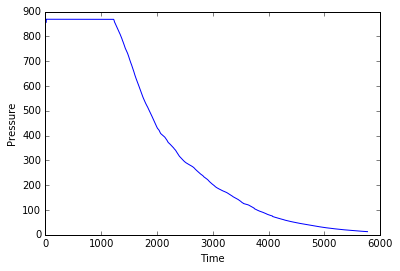

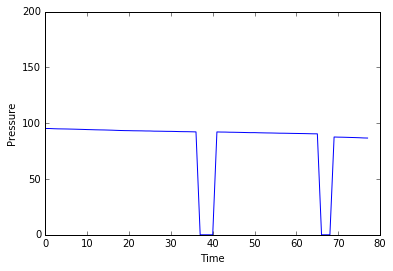

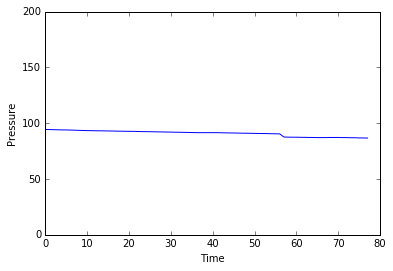

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import time


# Entire data set 
csvfile = open("baro.csv")
reader = csv.reader(csvfile)
t = []
alt = []
for row in reader: 
    t.append(row[0])
    alt.append(row[1])

plt.plot(alt)
plt.ylabel('Pressure')
plt.xlabel('Time')
plt.show()


# Subset of barometer data, I deleted sections and added zeros to show the kind of noise we might expect 
# The most likely kind of noise is no reading, and that has historically happened when it gets really cold. 

subset = open("subset.csv")
subset_reader = csv.reader(subset)
pressure = []
for row in subset_reader: 
    pressure.append(row[0])
plt.plot(pressure)
plt.ylabel('Pressure')
plt.xlabel('Time')
plt.axis([0, 80, 0, 200])
plt.show()



## This applies a simple median filter. This is a workin progress. Just playing with data and plots
n = 20
filtered = []
for i,p in enumerate(pressure):
    local = pressure[i:i+n]
    local.sort()
    mid = int(len(local) / 2)
    filtered.append(local[mid])
plt.plot(filtered)
plt.ylabel('Pressure')
plt.xlabel('Time')
plt.axis([0, 80, 0, 200])
plt.show()
